In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [3]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
customers_transactions = transactions.merge(customers, on='CustomerID')

In [9]:
customers_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [11]:
customers_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [31]:
customers_transactions['TransactionDate'] = pd.to_datetime(customers_transactions['TransactionDate'])

### RFM Analysis 
RFM analysis is a customer segmentation technique used to evaluate customer behaviour and value based on three key metrics:
1. Recency (R): Measures how recently a customer made a purchase (In this case LastTransactionDate).
2. Frequency (F): Measures how often a customer makes purchases within a given period (In this case total number of transactions made by customer).
3. Monetary Value (M): Measures the total monetary value a customer has spent (In this case the total spending of a customer).

In [33]:
aggregated_data = customers_transactions.groupby('CustomerID', as_index=False).agg(
    MonetaryValue=('TotalValue', 'sum'),          # TotalSpending of Customer
    Frequency=('TransactionID', 'count'),         # Total Number of transactions made by customer
    LastTransactionDate=('TransactionDate', 'max'))

In [35]:
aggregated_data.head()

,CustomerID,MonetaryValue,Frequency,LastTransactionDate
0,C0001,3354.52,5,2024-11-02 17:04:16
1,C0002,1862.74,4,2024-12-03 01:41:41
2,C0003,2725.38,4,2024-08-24 18:54:04
3,C0004,5354.88,8,2024-12-23 14:13:52
4,C0005,2034.24,3,2024-11-04 00:30:22


In [37]:
max_transaction_date = aggregated_data['LastTransactionDate'].max()
aggregated_data['Recency'] = (max_transaction_date - aggregated_data['LastTransactionDate']).dt.days
aggregated_data.head()

,CustomerID,MonetaryValue,Frequency,LastTransactionDate,Recency
0,C0001,3354.52,5,2024-11-02 17:04:16,55
1,C0002,1862.74,4,2024-12-03 01:41:41,25
2,C0003,2725.38,4,2024-08-24 18:54:04,125
3,C0004,5354.88,8,2024-12-23 14:13:52,4
4,C0005,2034.24,3,2024-11-04 00:30:22,54


In [39]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           199 non-null    object        
 1   MonetaryValue        199 non-null    float64       
 2   Frequency            199 non-null    int64         
 3   LastTransactionDate  199 non-null    datetime64[ns]
 4   Recency              199 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.9+ KB


### Distribution of Monetary Value, Frequency and Recency

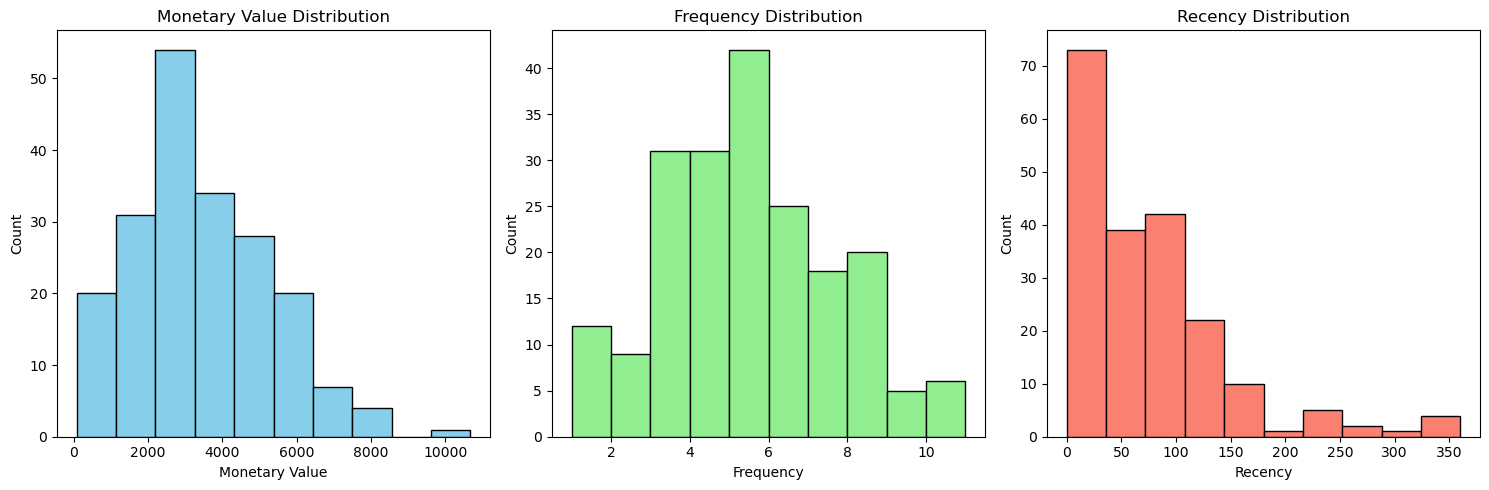

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_data['MonetaryValue'], color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_data['Frequency'], color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_data['Recency'], color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

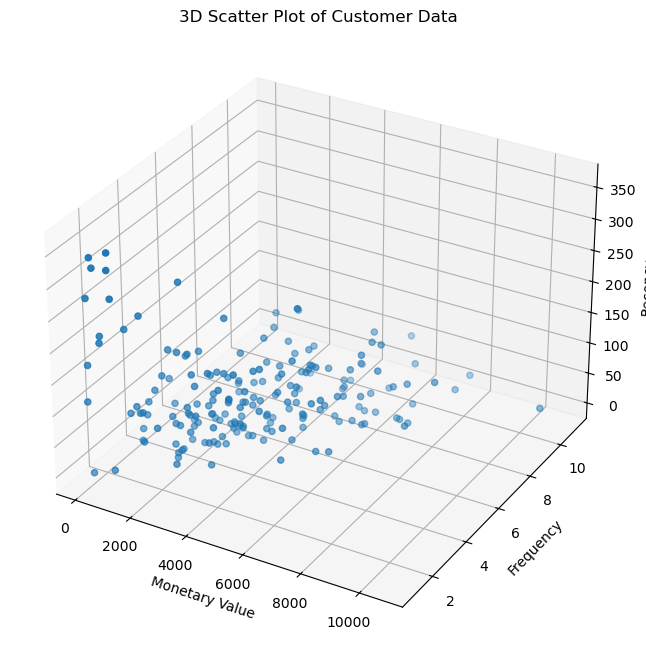

In [52]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(aggregated_data['MonetaryValue'], aggregated_data['Frequency'], aggregated_data['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

### Standard Scaling
Standard Scaling transforms the features of the data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

In [56]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(aggregated_data[['MonetaryValue', 'Frequency', 'Recency']])

scaled_data

array([[-0.06170143, -0.01145819, -0.26693284],
       [-0.87774353, -0.46749414, -0.69087246],
       [-0.40585722, -0.46749414,  0.72225961],
       [ 1.03254704,  1.35664965, -0.98763019],
       [-0.78392861, -0.92353008, -0.28106416],
       [ 0.41587942, -0.46749414,  0.11461282],
       [-0.48548229, -0.92353008,  0.72225961],
       [ 0.43997044,  2.26872154, -0.88871094],
       [-1.40630171, -0.92353008,  0.04395622],
       [-0.9571662 , -0.46749414, -0.46477133],
       [ 0.14369581, -0.01145819, -1.01589283],
       [ 0.96492372,  0.9006137 , -1.00176151],
       [ 1.38575064,  0.9006137 , -0.26693284],
       [-1.72239508, -1.83560198,  3.83115015],
       [-1.26353893, -1.37956603,  0.34071395],
       [ 0.22269727, -0.01145819, -0.3799834 ],
       [ 0.70375173,  1.35664965, -0.67674113],
       [ 0.71908486, -0.01145819,  1.01901734],
       [-0.70101045,  0.44457776, -0.33758944],
       [-1.39212827, -1.83560198,  3.66157431],
       [ 1.0681256 ,  1.35664965,  0.043

In [58]:
scaled_data_df = pd.DataFrame(scaled_data, index=aggregated_data.index, columns=('MonetaryValue', 'Frequency', 'Recency'))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.061701,-0.011458,-0.266933
1,-0.877744,-0.467494,-0.690872
2,-0.405857,-0.467494,0.722260
3,1.032547,1.356650,-0.987630
4,-0.783929,-0.923530,-0.281064
...,...,...,...
194,0.829053,-0.467494,-0.860448
195,-0.841689,-0.923530,-1.044155
196,-1.386975,-1.379566,0.142875
197,-0.813993,-0.467494,-0.153882


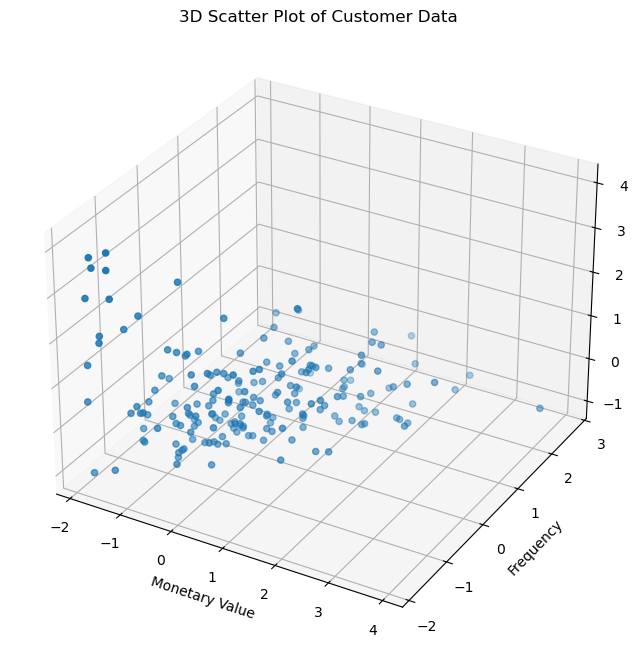

In [64]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

### KMeans Inertia, Silhouette Score, Davies Bouldin Score
- KMeans Inertia: Inertia measures the total sum of squared distances between data points and the centroids of their respective clusters. It indicates how "tight" the clusters are. We do that by identifying the "elbow point", where the plot drops and get's steeper.
- Silhouette Score: This is a metric that measures how well-separated and cohesive the clusters are. This is mainly used for checking the quality of the clusters. The highest silhouette score indicates the best-defined clusters.
- Davies-Bouldin (DB) Index: The DB index measures cluster compactness and separation. The lower values indicate more compact, well-separated clusters.

In [72]:
max_k = 8
inertia = []
silhoutte_scores = []
db_index_scores = []
k_values = range(2, max_k + 1)

In [74]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhoutte_scores.append(sil_score)
    db_score = davies_bouldin_score(scaled_data_df, cluster_labels)
    db_index_scores.append(db_score)
    inertia.append(kmeans.inertia_)

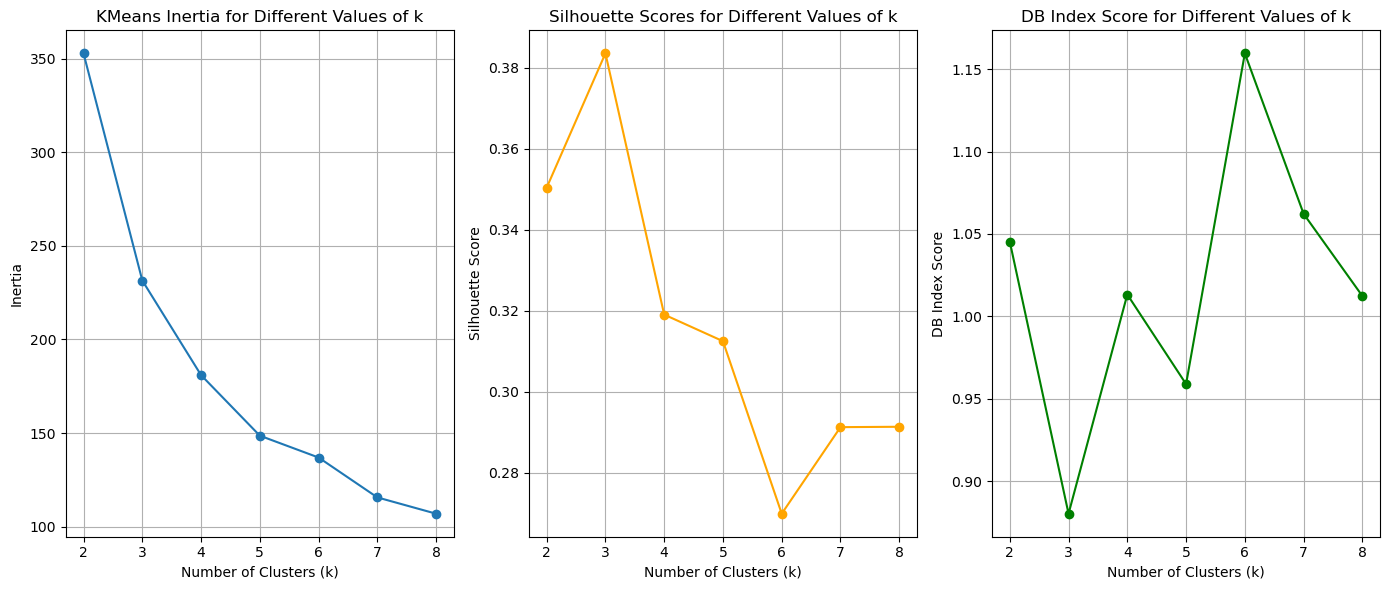

In [78]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_values, db_index_scores, marker='o', color='green')
plt.title('DB Index Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Inertia (Elbow Method): The "elbow" appears around 4 clusters, where the rate of decrease slown down.

Silhouette Score: The silhouette  score is highest for 3 clusters.

DB Index Score: The DB index is lowest for 3 clusters.

The metrices slightly favor 3 clusters so, I choose 3 clusters for kmeans clustering.

### KMeans Clustering

I choose KMeans beccause it is well-suited for clustering numerical and continours data like RFM metrics, providing customer insights while being effecient and interpretable

In [114]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1,
       0])

In [116]:
aggregated_data['Cluster'] = cluster_labels
aggregated_data

,CustomerID,MonetaryValue,Frequency,LastTransactionDate,Recency,Cluster
0,C0001,3354.52,5,2024-11-02 17:04:16,55,1
1,C0002,1862.74,4,2024-12-03 01:41:41,25,1
2,C0003,2725.38,4,2024-08-24 18:54:04,125,1
3,C0004,5354.88,8,2024-12-23 14:13:52,4,0
4,C0005,2034.24,3,2024-11-04 00:30:22,54,1
...,...,...,...,...,...,...
194,C0196,4982.88,4,2024-12-15 03:43:35,13,1
195,C0197,1928.65,3,2024-12-27 18:20:31,0,1
196,C0198,931.83,2,2024-10-04 18:31:12,84,1
197,C0199,1979.28,4,2024-10-26 00:01:58,63,1


In [118]:
cluster_colors = {0 : 'blue', 1: 'orange', 2: 'green', 3:'red'}
colors = aggregated_data['Cluster'].map(cluster_colors)

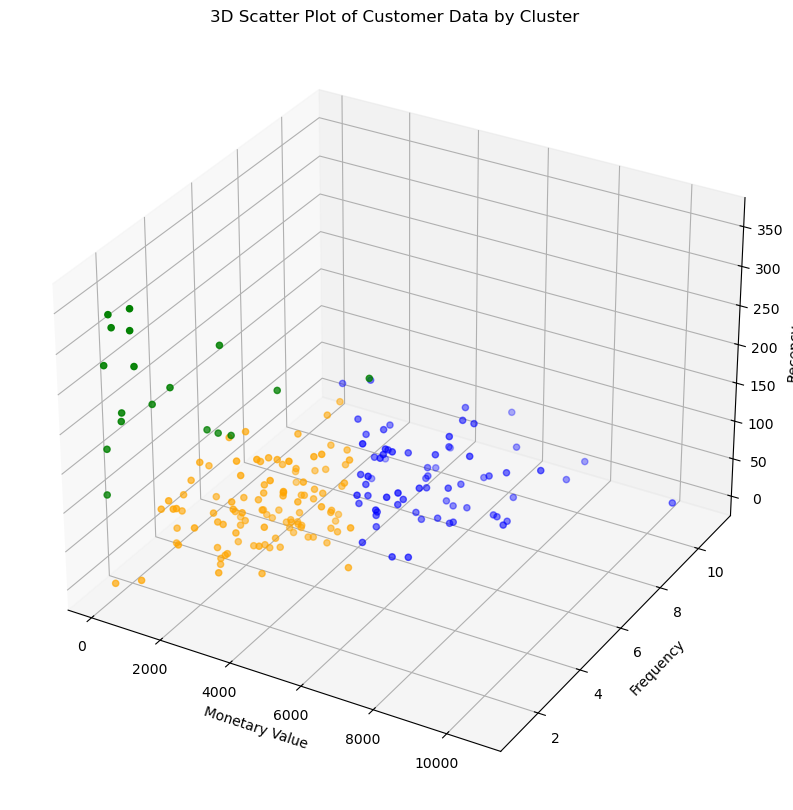

In [120]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(aggregated_data['MonetaryValue'],
                    aggregated_data['Frequency'],
                    aggregated_data['Recency'], c=colors, marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

**Cluster Findings**
1. Cluster 1 (Blue):
   - Represents high-spending and loyal customers who purchase frequently.
   - These are likely your most valuable customers who contribute significantly to revenue.
2. Cluster 2 (Orange):
   - Represents average-spending customers who purchase less frequently and may need re-engagement.
   - They could be encouraged to increase their spending with target offers.
3. Cluster 3 (Green):
   - Represents low-spending customers who may have churned or are at risk or leaving.
   - This might need a re-engagement strategy for these type of customers.